<a href="https://colab.research.google.com/github/Jaeljane/Attendance_Prediction/blob/main/Attendance_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Attendance_2.csv')
df=data.copy()
print(df.shape)
df.head()

(21912, 12)


,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association
0,12/10/2023,Thursday,Unscheduled,Unscheduled,Other Reasons,A001,T001,>24M,Oct,2,NH,Not_assosiated_with_Holiday
1,12/10/2023,Thursday,Day,Present,Other Reasons,A002,T002,12-24M,Oct,2,NH,Not_assosiated_with_Holiday
2,12/10/2023,Thursday,Day,Present,Other Reasons,A003,T003,>24M,Oct,2,NH,Not_assosiated_with_Holiday
3,12/10/2023,Thursday,Day,Present,Other Reasons,A004,T004,>24M,Oct,2,NH,Not_assosiated_with_Holiday
4,12/10/2023,Thursday,Day,Present,Other Reasons,A005,T005,>24M,Oct,2,NH,Not_assosiated_with_Holiday


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21912 entries, 0 to 21911
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   date                 21912 non-null  object
 1   day                  21911 non-null  object
 2   shift                21912 non-null  object
 3   attendance           21912 non-null  object
 4   Reasons              21912 non-null  object
 5   Employee_Id          21866 non-null  object
 6   Team                 21912 non-null  object
 7   Tenure               21677 non-null  object
 8   Month                21912 non-null  object
 9   Week_Numb            21912 non-null  int64 
 10  Holiday              21912 non-null  object
 11  Holiday_Association  21912 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.0+ MB


In [5]:
df['date']=pd.to_datetime(df['date'], format='%d/%m/%Y')
#sort data to be in descending order
df=df.sort_values(by='date')

df.reset_index(drop=True, inplace=True)
df.head()

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association
0,2023-04-28,Friday,Night,Present,Other Reasons,A170,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday
1,2023-04-28,Friday,Unscheduled,PTO,Other Reasons,NaN,T005,NaN,Apr,5,NH,Not_assosiated_with_Holiday
2,2023-04-28,Friday,Night,Present,Other Reasons,A104,T011,>24M,Apr,5,NH,Not_assosiated_with_Holiday
3,2023-04-28,Friday,Night,Absent,Sick Leave,A184,T009,>24M,Apr,5,NH,Not_assosiated_with_Holiday
4,2023-04-28,Friday,Night,Present,Other Reasons,A084,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday


###**EDA**

In [6]:
df['attendance'].value_counts()

Present        19742
PTO             1322
Absent           760
Unscheduled       88
Name: attendance, dtype: int64

We are only interested in Employees who were Present and those who were absent and not those who were on leave cause in this case PTO and Unscheduled implies that the employee was on planned leave hence we would have to remove these records before doing any further analysis

In [7]:
retain=["Present", "Absent"]

 # df=df[df['attendance'].isin(i)]
df = df[df['attendance'].isin(retain)]


In [8]:
#Check for null values
df.isnull().sum()

date                     0
day                      1
shift                    0
attendance               0
Reasons                  0
Employee_Id             34
Team                     0
Tenure                 218
Month                    0
Week_Numb                0
Holiday                  0
Holiday_Association      0
dtype: int64

In [9]:
#check those employees missing Employee ID

a=df[df['Employee_Id'].isnull()]
a.head()

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association
77,2023-04-28,Friday,Night,Absent,Unplanned Leave,NaN,T007,NaN,Apr,5,NH,Not_assosiated_with_Holiday
80,2023-04-28,Friday,Night,Absent,Unplanned Leave,NaN,T009,NaN,Apr,5,NH,Not_assosiated_with_Holiday
88,2023-04-28,Friday,Night,Present,Other Reasons,NaN,T012,NaN,Apr,5,NH,Not_assosiated_with_Holiday
346,2023-05-02,Tuesday,Night,Absent,Unplanned Leave,NaN,T007,NaN,May,1,NH,After Holiday
396,2023-05-02,Tuesday,Night,Present,Other Reasons,NaN,T012,NaN,May,1,NH,After Holiday


Since we are trying to predict individual employee attendance, it will not be useful having records that miss employee ID hence we would have to drop these records.

In [10]:
df = df[~df['Employee_Id'].isnull()]

In [11]:
df['shift'].replace('Unscheduled', "Day", inplace =True)

In [12]:
df_a=df[df['attendance']=="Absent"]
df_a.shape

(745, 12)

<Axes: title={'center': 'Reasons for Absenteeism'}>

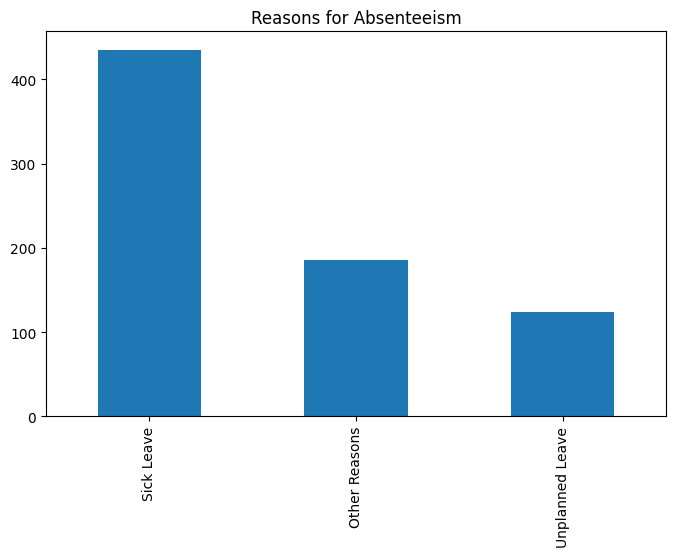

In [13]:
df_a['Reasons'].value_counts().plot(figsize=(8,5),kind="bar", title="Reasons for Absenteeism")

Sick leaves are the most common reason for absenteeism within employees


In [14]:
def proportions(x):
  a=df_a[x].value_counts()
  b=df[x].value_counts()
  c= a.index.union(b.index)

  value_counts_df = b.reindex(c, fill_value=0)
  value_counts_df_a = a.reindex(c, fill_value=0)
  proportions=value_counts_df_a/value_counts_df


  return proportions

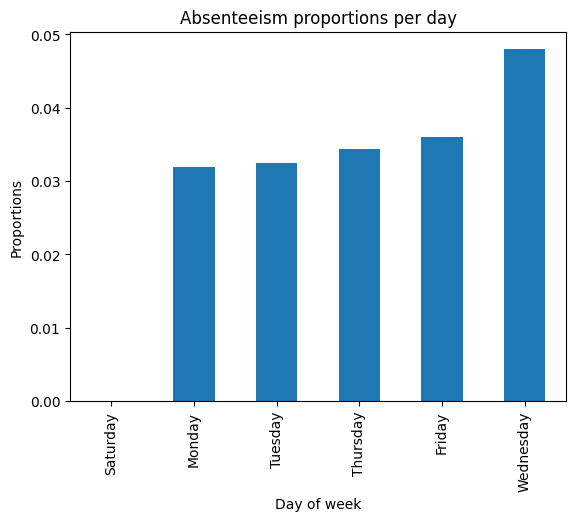

In [15]:
day=proportions('day')
day.sort_values().plot(kind="bar",title= "Absenteeism proportions per day", xlabel="Day of week", ylabel="Proportions");

Saturday is not a working day and if anywork is done on this particular day it is considered Overtime work and should be voluntary.
Wednesday on the other hand has the highest rate of absenteeism

In [16]:
i=df_a[df_a['shift']=="Unscheduled"]
i

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association


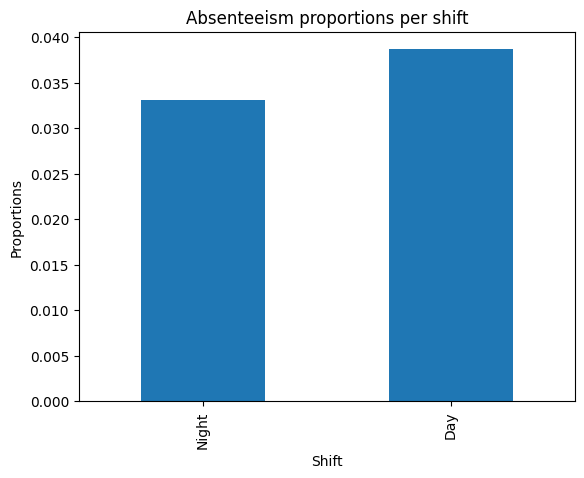

In [17]:
shift=proportions('shift')
shift.sort_values().plot(kind="bar",title= "Absenteeism proportions per shift", xlabel="Shift", ylabel="Proportions");

The day shift has the highest proportion of absenteeism

In [18]:
team=proportions("Team").sort_values()
Tenure=proportions('Tenure').sort_values()
Month=proportions("Month")
Week_Numb=proportions("Week_Numb").sort_values()

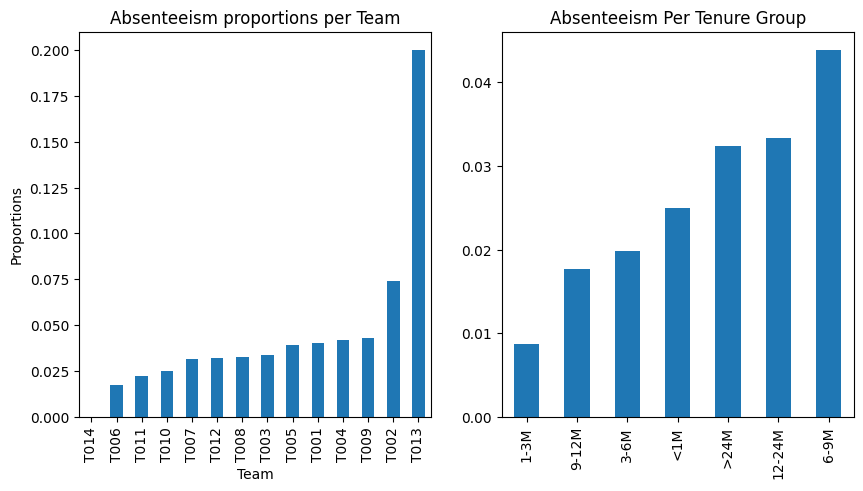

<Figure size 1000x500 with 0 Axes>

In [19]:
# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2)
plt.figure(figsize=[10, 5])

# Plot data from the DataFrame on the subplots

team.plot(figsize=[10, 5],kind="bar", xlabel="Team", ylabel="Proportions", ax=axs[0])
axs[0].set_title("Absenteeism proportions per Team")

Tenure.plot(figsize=[10, 5], kind="bar" ,ax=axs[1])
axs[1].set_title("Absenteeism Per Tenure Group")

# Show the figure
plt.show();


Team T013 has the highest rate of absenteeism and this should be looked into also employees with a tenure of between 6-9 months have a higher rate of absenteeism

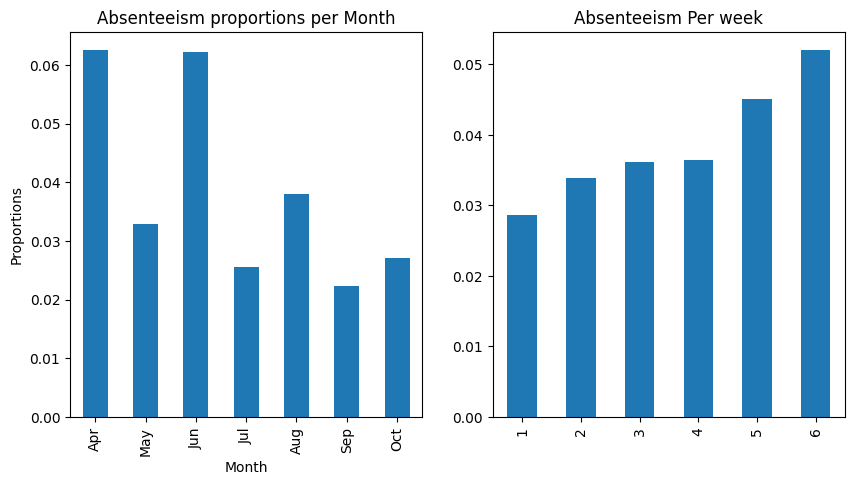

<Figure size 1000x500 with 0 Axes>

In [20]:
# Create a figure and a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2)
plt.figure(figsize=[10, 5])

# Plot data from the DataFrame on the subplots
# Generate the x-ticks for the graph
ticks = ["Apr", 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']
# Convert ticks into string values and to be displayed on the X axis
#labels = ['{}'.format(v) for v in ticks]
Month.plot(figsize=[10, 5],kind="bar", xlabel="Month", ylabel="Proportions", ax=axs[0])
axs[0].set_xticklabels(ticks)
axs[0].set_title("Absenteeism proportions per Month")

tick = ["1", "2", "3", "4", "5", "6"]
Week_Numb.plot(figsize=[10, 5], kind="bar" ,ax=axs[1])
axs[1].set_title("Absenteeism Per week")
axs[1].set_xticklabels(tick)
# Show the figure
plt.show();

Within the month Absenteeism increases as the month progresses. Also note that week happens when date 31st fall on a monday. This happened in July.


###**Remove outliers**

In [21]:
df['day'].value_counts()

Wednesday    4106
Thursday     4106
Monday       4096
Friday       4084
Tuesday      3974
Saturday      101
Name: day, dtype: int64

In [22]:
#Remove Saturdays data because attendance is voluntary and considered over time work
df=df[df['day']!="Saturday"]

In [23]:
#remove holidays also because working on a holiday is considered overtime and it is voluntary
df['Holiday'].value_counts()

NH    20017
H       350
Name: Holiday, dtype: int64

In [24]:
df=df[df['Holiday']!="H"]
df.head()

,date,day,shift,attendance,Reasons,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday,Holiday_Association
0,2023-04-28,Friday,Night,Present,Other Reasons,A170,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday
2,2023-04-28,Friday,Night,Present,Other Reasons,A104,T011,>24M,Apr,5,NH,Not_assosiated_with_Holiday
3,2023-04-28,Friday,Night,Absent,Sick Leave,A184,T009,>24M,Apr,5,NH,Not_assosiated_with_Holiday
4,2023-04-28,Friday,Night,Present,Other Reasons,A084,T002,>24M,Apr,5,NH,Not_assosiated_with_Holiday
5,2023-04-28,Friday,Night,Present,Other Reasons,A151,T003,>24M,Apr,5,NH,Not_assosiated_with_Holiday


In [25]:
#Drop unnecessary columns
#Drop Reasons because it is directly associated with attendance, drop Holiday cause it has only one variable
df.drop(columns=['Reasons', 'Holiday'], inplace=True)

In [26]:
#set date as index
df.set_index("date", inplace=True)
df.head()

,day,shift,attendance,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday_Association
date,,,,,,,,,
2023-04-28,Friday,Night,Present,A170,T002,>24M,Apr,5,Not_assosiated_with_Holiday
2023-04-28,Friday,Night,Present,A104,T011,>24M,Apr,5,Not_assosiated_with_Holiday
2023-04-28,Friday,Night,Absent,A184,T009,>24M,Apr,5,Not_assosiated_with_Holiday
2023-04-28,Friday,Night,Present,A084,T002,>24M,Apr,5,Not_assosiated_with_Holiday
2023-04-28,Friday,Night,Present,A151,T003,>24M,Apr,5,Not_assosiated_with_Holiday


In [27]:
df['attendance'].value_counts()

Present    19272
Absent       745
Name: attendance, dtype: int64

In [28]:
#encode the target variable
df["attendance"] = df["attendance"].apply(lambda x: 1 if x == "Present" else 0)

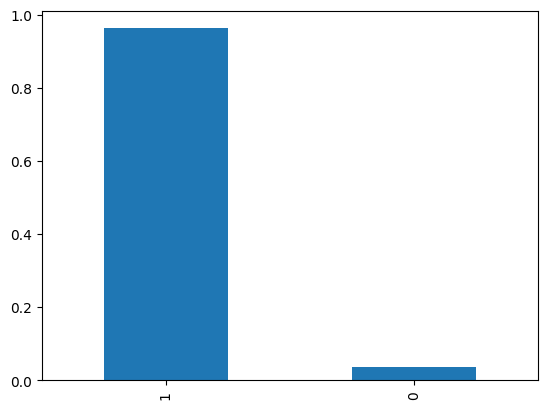

In [29]:
df['attendance'].value_counts(normalize=True).plot(kind="bar");

That's good news for the company! Since absenteeism is quite low. However, it also shows us that we have an imbalanced dataset, where our majority class(Present) is far bigger than our minority class(Absent).

###**Split the Dataset**

In [30]:
target="attendance"
X=df.drop(columns=target)
y=df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (20017, 8)
y shape: (20017,)


In [31]:
cutoff = 17483
X_train, y_train =X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

print("X_train:", X_train.shape )
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test", y_test.shape)

X_train: (17483, 8)
y_train: (17483,)
X_test: (2534, 8)
y_test (2534,)


In [32]:
X_train.head()

,day,shift,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday_Association
date,,,,,,,,
2023-04-28,Friday,Night,A170,T002,>24M,Apr,5,Not_assosiated_with_Holiday
2023-04-28,Friday,Night,A104,T011,>24M,Apr,5,Not_assosiated_with_Holiday
2023-04-28,Friday,Night,A184,T009,>24M,Apr,5,Not_assosiated_with_Holiday
2023-04-28,Friday,Night,A084,T002,>24M,Apr,5,Not_assosiated_with_Holiday
2023-04-28,Friday,Night,A151,T003,>24M,Apr,5,Not_assosiated_with_Holiday


###**Resample**

In [33]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [34]:
over_sampler = RandomOverSampler()
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print(X_train_over.shape)
X_train_over.head()

(33576, 8)


,day,shift,Employee_Id,Team,Tenure,Month,Week_Numb,Holiday_Association
0,Friday,Night,A170,T002,>24M,Apr,5,Not_assosiated_with_Holiday
1,Friday,Night,A104,T011,>24M,Apr,5,Not_assosiated_with_Holiday
2,Friday,Night,A184,T009,>24M,Apr,5,Not_assosiated_with_Holiday
3,Friday,Night,A084,T002,>24M,Apr,5,Not_assosiated_with_Holiday
4,Friday,Night,A151,T003,>24M,Apr,5,Not_assosiated_with_Holiday


In [35]:
y_train_over.value_counts()

1    16788
0    16788
Name: attendance, dtype: int64

###**Build Model**

####Set the baseline accuracy Score

In [36]:
base_acc=y_train.value_counts(normalize=True).max()
print("Baseline Accuracy Score:", base_acc )

Baseline Accuracy Score: 0.9602470971801178


Our Model should try to beat this score

In [37]:
!pip install --upgrade pip
!pip install --upgrade setuptools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.9/807.9 kB 10.3 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


####Make pipeline and Build the Model

In [38]:
!pip install category_encoders

from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.0 MB/s eta 0:00:00


In [39]:
model= make_pipeline(SimpleImputer(strategy='most_frequent'),
                      OneHotEncoder(use_cat_names=True),
                     DecisionTreeClassifier(random_state=42))
model.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(cols=[0, 1, 2, 3, 4, 5, 6, 7],
                               use_cat_names=True)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [40]:
acc_train=model.score(X_train, y_train)
acc_test=model.score(X_test, y_test)

print("Accuracy Train Score", round(acc_train, 4))
print("Accuracy Test Score", round(acc_test, 4))

Accuracy Train Score 1.0
Accuracy Test Score 0.957


Accuracy scores can be misleading when dealing with imbalanced data, because the model may simply be predicting the majority class most of the time. Instead of looking at overall accuracy, we should look at how well the model predicts each class individually. This is because we may be more concerned with the model's performance on the minority class, even if the overall accuracy is high.

####Confusion matrix


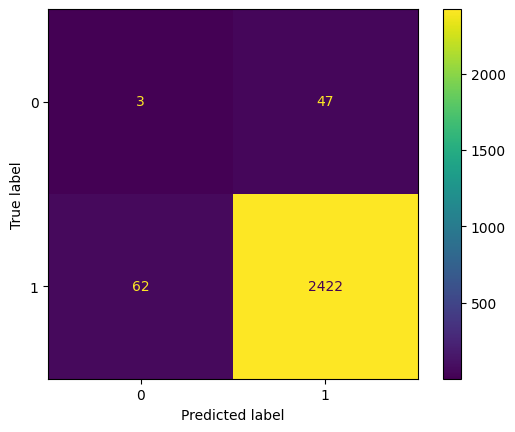

In [41]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

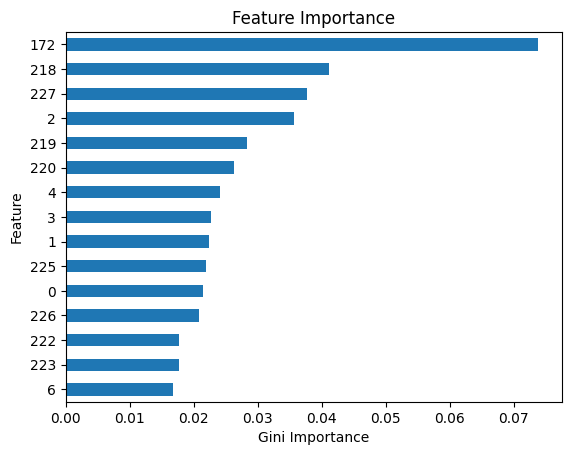

In [45]:
# Get the feature importances
feature_importances = model.named_steps['decisiontreeclassifier'].feature_importances_
features = model.named_steps['onehotencoder'].get_feature_names()

# Create a Pandas Series of the feature importances
feat_imp = pd.Series(feature_importances)

# Sort the Series by the feature importances
feat_imp = feat_imp.sort_values()

# Plot the Series
feat_imp.tail(15).plot(kind='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [47]:
# Assuming you've already trained your model as described in your code
# ...

# Access the DecisionTreeClassifier from the pipeline
decision_tree_classifier = model.named_steps['decisiontreeclassifier']

# Get the feature importances
feature_importances = decision_tree_classifier.feature_importances_

# Now, you can associate the feature importances with their corresponding feature names
# by accessing the feature names from the OneHotEncoder

# Access the OneHotEncoder from the pipeline
one_hot_encoder = model.named_steps['onehotencoder']

# Get the feature names
feature_names = one_hot_encoder.get_feature_names(input_features=X_train.columns)

# Create a list of tuples with feature names and their corresponding importances
importance_feature_pairs = list(zip(feature_names, feature_importances))

# Sort the list by feature importances in descending order
importance_feature_pairs.sort(key=lambda x: x[1], reverse=True)

# Print or analyze the feature importances
for feature_name, importance in importance_feature_pairs:
    print(f"Feature: {feature_name}, Importance: {importance}")


TypeError: ignored

In [50]:
# Access the OneHotEncoder from the pipeline
one_hot_encoder = model.named_steps['onehotencoder']

# Get the transformed feature names from the OneHotEncoder
feature_names = one_hot_encoder.get_feature_names_out()

# Create a list of tuples with feature names and their corresponding importances
importance_feature_pairs = list(zip(feature_names, feature_importances))

# Sort the list by feature importances in descending order
importance_feature_pairs.sort(key=lambda x: x[1], reverse=True)

# Print or analyze the feature importances
for feature_name, importance in importance_feature_pairs:
     print(f"Feature: {feature_name}, Importance: {importance}")

# Create a pandas Series
feat_imp = pd.Series(importances, index=feature_names)

# Sort the Series by importance in descending order
feat_imp = feat_imp.sort_values(ascending=False)

# Print or use the feat_imp Series
print(feat_imp)

Feature: 2_A189, Importance: 0.07382298266708702
Feature: 5_May, Importance: 0.04121128680866632
Feature: 6_4.0, Importance: 0.037676751455996395
Feature: 0_Wednesday, Importance: 0.03568519462515065
Feature: 5_Jun, Importance: 0.02832680713710354
Feature: 5_Jul, Importance: 0.02626724918821955
Feature: 0_Monday, Importance: 0.02415606932498357
Feature: 0_Thursday, Importance: 0.022698742373042296
Feature: 0_Tuesday, Importance: 0.02244614593271192
Feature: 6_2.0, Importance: 0.021888196036875685
Feature: 0_Friday, Importance: 0.02149669995201147
Feature: 6_3.0, Importance: 0.020824787181889626
Feature: 5_Sep, Importance: 0.017666112531606607
Feature: 6_5.0, Importance: 0.017631785993067885
Feature: 1_Day, Importance: 0.01667936694474072
Feature: 5_Aug, Importance: 0.013991876286992607
Feature: 3_T011, Importance: 0.012627975651099107
Feature: 2_A111, Importance: 0.00988236464123977
Feature: 3_T004, Importance: 0.009774372494432885
Feature: 3_T006, Importance: 0.00975956688130708
Featu

NameError: ignored

Feature: 2_A189, Importance: 0.07382298266708702
Feature: 5_May, Importance: 0.04121128680866632
Feature: 6_4.0, Importance: 0.037676751455996395
Feature: 0_Wednesday, Importance: 0.03568519462515065
Feature: 5_Jun, Importance: 0.02832680713710354
Feature: 5_Jul, Importance: 0.02626724918821955
Feature: 0_Monday, Importance: 0.02415606932498357
Feature: 0_Thursday, Importance: 0.022698742373042296
Feature: 0_Tuesday, Importance: 0.02244614593271192
Feature: 6_2.0, Importance: 0.021888196036875685
Feature: 0_Friday, Importance: 0.02149669995201147
Feature: 6_3.0, Importance: 0.020824787181889626
Feature: 5_Sep, Importance: 0.017666112531606607
Feature: 6_5.0, Importance: 0.017631785993067885
Feature: 1_Day, Importance: 0.01667936694474072
Feature: 5_Aug, Importance: 0.013991876286992607
Feature: 3_T011, Importance: 0.012627975651099107
Feature: 2_A111, Importance: 0.00988236464123977
Feature: 3_T004, Importance: 0.009774372494432885
Feature: 3_T006, Importance: 0.00975956688130708
Featu

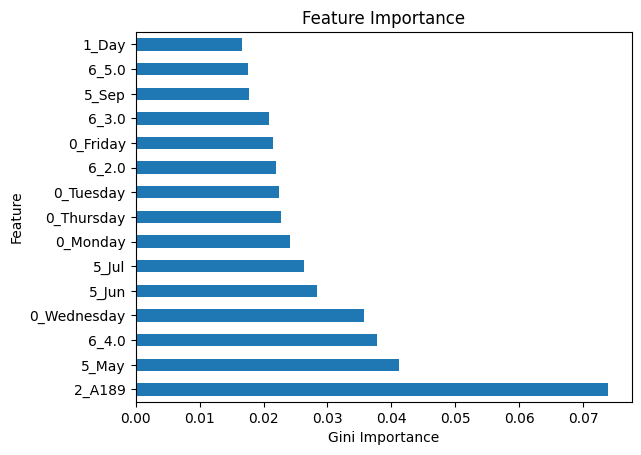

In [54]:
# Access the OneHotEncoder from the pipeline
one_hot_encoder = model.named_steps['onehotencoder']

# Get the transformed feature names from the OneHotEncoder
feature_names = one_hot_encoder.get_feature_names_out()

# Create a list of tuples with feature names and their corresponding importances
importance_feature_pairs = list(zip(feature_names, feature_importances))

# Sort the list by feature importances in descending order
importance_feature_pairs.sort(key=lambda x: x[1], reverse=True)

# Print or analyze the feature importances
for feature_name, importance in importance_feature_pairs:
     print(f"Feature: {feature_name}, Importance: {importance}")

# Extract the feature names and importances from the sorted list
feature_names = [pair[0] for pair in importance_feature_pairs]
importances = [pair[1] for pair in importance_feature_pairs]

# Create a pandas Series
feat_imp = pd.Series(importances, index=feature_names)

# Sort the Series by importance in descending order
feat_imp = feat_imp.sort_values(ascending=False)

# Print or use the feat_imp Series
#print(feat_imp)

# Sort the Series by the feature importances
#feat_imp = feat_imp.sort_values()

# Plot the Series
feat_imp.head(15).plot(kind='barh')
plt.xlabel('Gini Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
